<a href="https://colab.research.google.com/github/carlosmvond/hybrid-modelling-of-batch-bioreactors/blob/main/Application_2_yeast_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first code serves to plot the data from the article:

Liu, Y. S., & Wu, J. Y. (2008). Modeling of Xanthophyllomyces dendrorhous growth on glucose and overflow metabolism in batch and fed‐batch cultures for astaxanthin production. Biotechnology and bioengineering, 101(5), 996-1004.

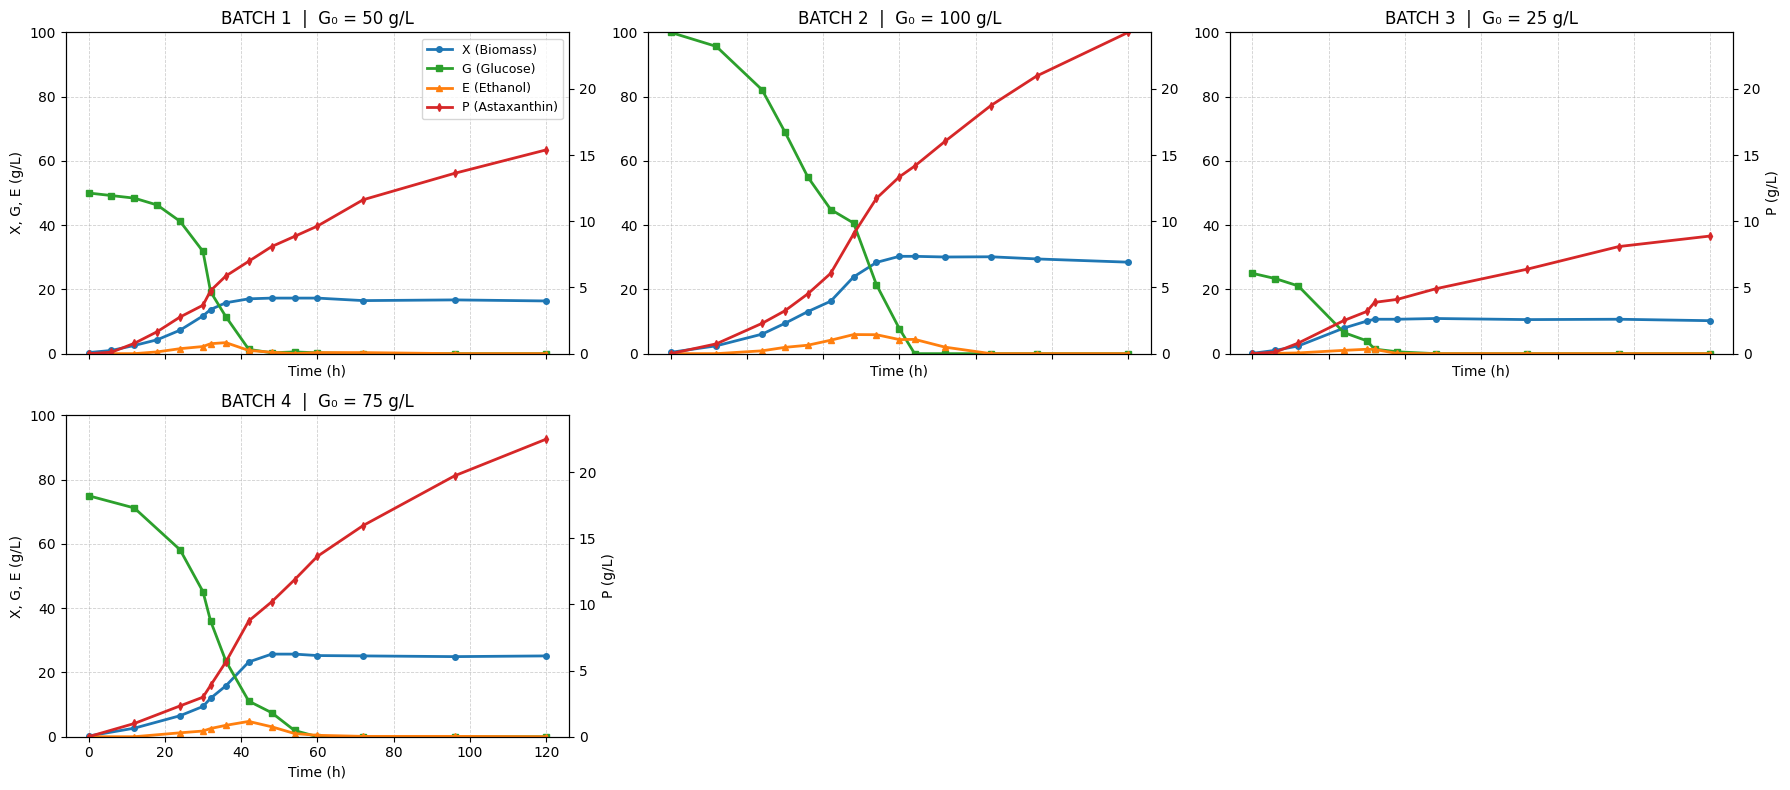

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# === Experimental data ===
raw_t = [
    [0.0, 6.0, 12.0, 18.0, 24.0, 30.0, 32.0, 36.0, 42.0, 48.0, 54.0, 60.0, 72.0, 96.0, 120.0],
    [0.0, 12.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0, 64.0, 72.0, 84.0, 96.0, 120.0],
    [0.0, 6.0, 12.0, 24.0, 30.0, 32.0, 38.0, 48.0, 72.0, 96.0, 120.0],
    [0.0, 12.0, 24.0, 30.0, 32.0, 36.0, 42.0, 48.0, 54.0, 60.0, 72.0, 96.0, 120.0]
]
raw_X = [
    [0.33, 1.00, 2.55, 4.32, 7.31, 11.75, 13.74, 15.84, 17.06, 17.29, 17.29, 17.29, 16.51, 16.73, 16.40],
    [0.40, 2.43, 6.07, 9.44, 13.09, 16.32, 23.88, 28.40, 30.29, 30.29, 30.08, 30.15, 29.48, 28.47],
    [0.10, 1.03, 2.39, 7.98, 10.14, 10.71, 10.71, 10.94, 10.60, 10.71, 10.26],
    [0.22, 2.66, 6.54, 9.42, 11.97, 15.84, 23.27, 25.71, 25.71, 25.26, 25.15, 24.93, 25.15]
]
raw_G = [
    [50.00, 49.20, 48.40, 46.26, 41.18, 31.82, 19.25, 11.50, 1.34, 0.27, 0.53, 0.27, 0.00, 0.00, 0.00],
    [100.00, 95.62, 82.12, 68.97, 54.97, 44.86, 40.64, 21.42, 7.76, 0.00, 0.00, 0.00, 0.00, 0.00],
    [25.00, 23.36, 21.08, 6.55, 3.99, 1.42, 0.57, 0.00, 0.00, 0.00, 0.00],
    [75.00, 71.19, 58.17, 45.15, 36.01, 23.55, 11.08, 7.48, 1.94, 0.00, 0.00, 0.00, 0.00]
]
raw_E = [
    [0.00, 0.00, 0.00, 0.55, 1.55, 2.22, 3.10, 3.43, 1.00, 0.44, 0.00, 0.33, 0.33, 0.00, 0.00],
    [0.00, 0.00, 0.88, 1.96, 2.63, 4.18, 5.94, 5.90, 4.38, 4.45, 2.02, 0.00, 0.00, 0.00],
    [0.00, 0.10, 0.23, 1.03, 1.37, 1.32, 0.05, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 1.22, 1.77, 2.55, 3.55, 4.76, 3.10, 1.00, 0.44, 0.11, 0.11, 0.00]
]
raw_P = [
    [0.00, 0.11, 0.78, 1.66, 2.77, 3.66, 4.76, 5.87, 6.98, 8.09, 8.86, 9.64, 11.63, 13.63, 15.40],
    [0.00, 0.74, 2.29, 3.24, 4.52, 6.07, 9.04, 11.74, 13.36, 14.17, 16.05, 18.75, 20.98, 24.28],
    [0.000, 0.120, 0.798, 2.507, 3.191, 3.875, 4.103, 4.900, 6.382, 8.091, 8.889],
    [0.00, 1.00, 2.33, 2.99, 3.88, 5.65, 8.75, 10.19, 11.86, 13.63, 15.96, 19.72, 22.49]
]

# Infer S0 as the first glucose value (G) of each batch
initial_substrates = [float(np.array(G)[0]) for G in raw_G]

# --- Consistent colors across all plots ---
COL_X = "#1f77b4"  # blue
COL_G = "#2ca02c"  # green
COL_E = "#ff7f0e"  # orange
COL_P = "#d62728"  # red (right axis)

# --- Global min/max values to ensure consistent axis limits ---
X_all = np.concatenate([np.asarray(X, dtype=float) for X in raw_X])
G_all = np.concatenate([np.asarray(G, dtype=float) for G in raw_G])
E_all = np.concatenate([np.asarray(E, dtype=float) for E in raw_E])
P_all = np.concatenate([np.asarray(P, dtype=float) for P in raw_P])

ymin_left  = min(X_all.min(), G_all.min(), E_all.min())
ymax_left  = max(X_all.max(), G_all.max(), E_all.max())
ymin_right = P_all.min()
ymax_right = P_all.max()

# --- Figure layout: 2 rows × 3 columns ---
n_batches = len(initial_substrates)
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True)
axes = axes.flatten()

for i, (S0, t_i, X_i, G_i, E_i, P_i) in enumerate(
    zip(initial_substrates, raw_t, raw_X, raw_G, raw_E, raw_P)
):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    t = np.asarray(t_i, dtype=float)
    X = np.asarray(X_i, dtype=float)
    G = np.asarray(G_i, dtype=float)
    E = np.asarray(E_i, dtype=float)
    P = np.asarray(P_i, dtype=float)

    # --- Left axis: X, G, and E (lines + markers) ---
    ax1.plot(t, X, '-o', lw=2, ms=4, color=COL_X, label='X (Biomass)')
    ax1.plot(t, G, '-s', lw=2, ms=4, color=COL_G, label='G (Glucose)')
    ax1.plot(t, E, '-^', lw=2, ms=4, color=COL_E, label='E (Ethanol)')
    ax1.set_ylim(ymin_left, ymax_left)
    ax1.set_xlabel("Time (h)")
    if i % 3 == 0:
        ax1.set_ylabel("X, G, E (g/L)")

    # --- Right axis: P (Astaxanthin) ---
    ax2.plot(t, P, '-d', lw=2, ms=4, color=COL_P, label='P (Astaxanthin)')
    ax2.set_ylim(ymin_right, ymax_right)
    if i % 3 == 2 or i == n_batches - 1:
        ax2.set_ylabel("P (g/L)")

    # --- Title with batch number and initial substrate ---
    ax1.set_title(f"BATCH {i+1}  |  G₀ = {S0:g} g/L")

    # --- Grid styling ---
    ax1.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

    # --- Combined legend (only for the first subplot) ---
    if i == 0:
        l1, lab1 = ax1.get_legend_handles_labels()
        l2, lab2 = ax2.get_legend_handles_labels()
        ax1.legend(l1 + l2, lab1 + lab2, loc="upper right", fontsize=9)

# --- Turn off unused subplots if there are fewer than 6 batches ---
for j in range(n_batches, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np

def plot_network(net_params, layer_sizes, title="Neural Network (weight magnitudes)"):
    """
    Draws a simple feedforward network diagram where connection transparency
    indicates the absolute value of the weight.
    """
    # Normalize all weights to [0,1] for visualization
    all_weights = np.concatenate([np.abs(np.ravel(np.array(net_params[k])))
                                  for k in net_params if k.startswith("W")])
    w_max = np.max(all_weights) if np.max(all_weights) > 0 else 1.0

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.axis("off")

    # Horizontal spacing between layers
    x_spacing = 2.0
    y_spacing = 1.0

    # Find max layer width for vertical centering
    max_neurons = max(layer_sizes)

    # Compute coordinates for each layer
    coords = []
    for i, n in enumerate(layer_sizes):
        y_positions = np.linspace(-y_spacing*(n-1)/2, y_spacing*(n-1)/2, n)
        x_positions = np.full(n, i * x_spacing)
        coords.append(list(zip(x_positions, y_positions)))

    # Plot connections
    for i in range(len(layer_sizes)-1):
        W = np.array(net_params[f"W{i}"])
        for n_out, (x2, y2) in enumerate(coords[i+1]):
            for n_in, (x1, y1) in enumerate(coords[i]):
                w = W[n_out, n_in]
                alpha = min(1.0, abs(w)/w_max)   # normalize transparency
                color = 'blue' if w >= 0 else 'red'
                ax.plot([x1, x2], [y1, y2], color=color, alpha=alpha, lw=1.2)

    # Plot neurons as circles
    for layer in coords:
        for (x, y) in layer:
            ax.scatter(x, y, s=120, color="black", zorder=3)

    ax.set_title(title)
    plt.tight_layout()
    plt.show()


The following code trains a hybrid model to previous data.

The model structure is given by  

$$
\begin{aligned}
\frac{dx}{dt} &= f_{1}(\cdot)\,x,\\[4pt]
\frac{dG}{dt} &= f_{2}(\cdot)\,G\,x,\\[4pt]
\frac{dE}{dt} &= f_{3}(\cdot)\,E\,x + g_{3}(\cdot)\,x,\\[4pt]
\frac{dP}{dt} &= f_{4}(\cdot)\,P + g_{4}(\cdot)\,x.
\end{aligned}
$$

The functions  $f_i$, $i=1,2,3$ and $g_3$ form the **output layer** of the neural network. The activation function in the output layer is the **identity** for $f_i$ and **ReLU** for $ g_3$.




---

### 🔧 Algorithm configuration

The algorithm is configured at the beginning of the code.  
The main **hyperparameters and options** are defined at the start of the script:

- **TRAIN_MODE** (`"batch"` | `"global"`):  
  - `"batch"`: each batch experiment is treated as an independent mini-batch; parameters are updated multiple times per epoch.  
  - `"global"`: the loss from all batches is accumulated, and a single update is performed per epoch (equivalent to one large global batch).

- **LR** (learning rate):  
  Update step size for the Adam optimizer.  
  High values may destabilize training; low values may slow convergence.

- **NUM_EPOCHS:**  
  Number of complete passes through the training set.

- **DROPOUT_RATE_HIDDEN:**  
  Fraction of hidden neurons randomly turned off during training (standard dropout, disabled during evaluation).  
  Useful for regularization and, optionally, for estimating uncertainty via Monte Carlo dropout.

- **EPS:**  
  Small positive constant used to stabilize divisions in the loss function (prevents division by zero).  
  A typical value is $10^{-8}$.

- **SEED:**  
  Master random seed for reproducibility (affects initialization and dropout masks).  
  It does not guarantee identical results across hardware, but reduces variability.

- **N_SEED:**  
  Number of initialization. By default is set to 10.
---

### 🧠 MLP architecture

Defined by `hidden_layers` and `layer_sizes` (e.g., `3-5-5-5-4`),  
where **3** is the input dimension, **4** is the output dimension,  
and the intermediate values correspond to the hidden layers.

---


In [ ]:
import os
import time
import numpy as np
import jax
import jax.numpy as jnp
from jax import config
from jax.experimental.ode import odeint
import optax
from jax.lib import xla_bridge

# ========================================================
# 1) FORCE TPU USAGE FOR JAX (comment out if not on TPU)
# ========================================================
config.update("jax_platform_name", "tpu")
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=8"

# ========================================================
# 0. CONFIG (match the "seed sweep" style)
# ========================================================
TRAIN_MODE = "batch"       # "batch" or "global"
LR = 1e-3
NUM_EPOCHS = 2000
DROPOUT_RATE_HIDDEN = 0.1
EPS = 1.0e-8

SEED_START = 1
N_SEEDS = 10               # number of random initializations, seeds: SEED_START + 0..N_SEEDS-1

hidden_layers = [4, 4, 4, 4]
layer_sizes = [4] + hidden_layers + [6]  # input=[X,G,E,P] -> output=[f1,f2,f3,f4,g3,g4]

LAMBDA_IC = 1.0

train_idxs = [0, 1, 2]
valid_idxs = [3]

# ========================================================
# 1. DATA PREP (raw_t, raw_X, raw_G, raw_E, raw_P must exist)
# ========================================================
t_batches = [jax.device_put(jnp.array(arr)) for arr in raw_t]
x_batches = [jax.device_put(jnp.array(arr)) for arr in raw_X]
g_batches = [jax.device_put(jnp.array(arr)) for arr in raw_G]
e_batches = [jax.device_put(jnp.array(arr)) for arr in raw_E]
p_batches = [jax.device_put(jnp.array(arr)) for arr in raw_P]

t_train = [t_batches[i] for i in train_idxs]
x_train = [x_batches[i] for i in train_idxs]
g_train = [g_batches[i] for i in train_idxs]
e_train = [e_batches[i] for i in train_idxs]
p_train = [p_batches[i] for i in train_idxs]

t_valid = [t_batches[i] for i in valid_idxs]
x_valid = [x_batches[i] for i in valid_idxs]
g_valid = [g_batches[i] for i in valid_idxs]
e_valid = [e_batches[i] for i in valid_idxs]
p_valid = [p_batches[i] for i in valid_idxs]

# ========================================================
# 1.1 Helpers
# ========================================================
def count_params_pytree(pytree):
    leaves, _ = jax.tree_util.tree_flatten(pytree)
    total = 0
    for l in leaves:
        if isinstance(l, (np.ndarray, jnp.ndarray)):
            total += int(np.prod(np.array(l.shape)))
        else:
            total += 1
    return total

def arch_string(layer_sizes):
    return "-".join(str(n) for n in layer_sizes)

def pytree_snapshot_to_cpu(pytree):
    """Safe snapshot of params: convert to numpy arrays on host."""
    return jax.tree_util.tree_map(lambda x: np.array(x), pytree)

# ========================================================
# 2. NEURAL NETWORK + HYBRID ODE
# ========================================================
def init_net_params(rng_key, layer_sizes):
    params = {}
    keys = jax.random.split(rng_key, 2 * (len(layer_sizes) - 1))
    k = 0
    for i in range(len(layer_sizes) - 1):
        n_in, n_out = layer_sizes[i], layer_sizes[i + 1]
        params[f"W{i}"] = jax.random.uniform(keys[k], (n_out, n_in), minval=-0.1, maxval=0.1)
        params[f"b{i}"] = jax.random.uniform(keys[k + 1], (n_out,), minval=-0.1, maxval=0.1)
        k += 2
    return params

def sample_hidden_masks(net_params, rate, rng):
    if rate is None or rate <= 0.0:
        return None
    keep = 1.0 - rate
    masks = []
    num_layers = len(net_params) // 2
    for i in range(num_layers - 1):
        size = net_params[f"b{i}"].shape
        rng, ki = jax.random.split(rng)
        mask = jax.random.bernoulli(ki, p=keep, shape=size)
        mask = mask.astype(jnp.float32) / keep
        masks.append(mask)
    return masks

def neural_network(net_params, y, *, train=False, masks=None):
    a = y
    num_layers = len(net_params) // 2
    for i in range(num_layers):
        W, b = net_params[f"W{i}"], net_params[f"b{i}"]
        z = W @ a + b
        if i < num_layers - 1:
            a = jnp.tanh(z)
            if train and (masks is not None):
                a = a * masks[i]
        else:
            a = z
    return a

def model_jax(net_params, y, t, *, train=False, masks=None):
    X, G, E, P = y
    f1, f2, f3, f4, g3, g4 = neural_network(net_params, jnp.array([X, G, E, P]),
                                            train=train, masks=masks)
    g3_clamped = jax.nn.relu(g3)
    g4_clamped = jax.nn.relu(g4)
    return jnp.stack([
        f1 * X,
        f2 * G * X,
        (f3 * E + g3_clamped) * X,
        (f4 * P + g4_clamped * X),
    ])

def predict(net_params, t_array, x0, g0, *, e0=0.0, p0=0.0, train=False, masks=None):
    def rhs(y, tt):
        return model_jax(net_params, y, tt, train=train, masks=masks)
    y0 = jnp.array([x0, g0, e0, p0])
    sol = odeint(rhs, y0, t_array, rtol=1e-6, atol=1e-7, mxstep=2000)
    return sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

predict = jax.jit(predict, static_argnames=("train",))

# ========================================================
# 2.1 IC offsets (log-offsets)
# ========================================================
def init_ic_offset_params_from_data(x_train, g_train):
    n = len(x_train)
    x0_meas = jnp.array([float(np.array(x_train[i])[0]) for i in range(n)])
    g0_meas = jnp.array([float(np.array(g_train[i])[0]) for i in range(n)])
    ic_alpha = {"alpha_x": jnp.zeros_like(x0_meas),
                "alpha_g": jnp.zeros_like(g0_meas)}
    ic_meas = {"x0": x0_meas, "g0": g0_meas}
    return ic_alpha, ic_meas

def ic_for_train_batch(params, idx):
    x0_meas = params["ic_meas"]["x0"][idx]
    g0_meas = params["ic_meas"]["g0"][idx]
    alpha_x = params["ic_alpha"]["alpha_x"][idx]
    alpha_g = params["ic_alpha"]["alpha_g"][idx]
    x0 = x0_meas * jnp.exp(alpha_x)
    g0 = g0_meas * jnp.exp(alpha_g)
    e0 = jnp.array(0.0)
    p0 = jnp.array(0.0)
    return x0, g0, e0, p0

# ========================================================
# 3. LOSSES
# ========================================================
def safe_rel(pred, obs):
    denom = jnp.maximum(jnp.mean(jnp.abs(obs)), EPS)
    return (pred - obs) / denom

def ic_reg_term(params, idx, lambda_ic=LAMBDA_IC):
    alpha_x = params["ic_alpha"]["alpha_x"][idx]
    alpha_g = params["ic_alpha"]["alpha_g"][idx]
    return lambda_ic * (alpha_x**2 + alpha_g**2)

def batch_loss_train(params, idx, rng):
    net_params = params["net"]
    t_obs, x_obs, g_obs, e_obs, p_obs = (
        t_train[idx], x_train[idx], g_train[idx], e_train[idx], p_train[idx]
    )
    x0, g0, e0, p0 = ic_for_train_batch(params, idx)
    masks = sample_hidden_masks(net_params, DROPOUT_RATE_HIDDEN, rng)

    x_pred, g_pred, e_pred, p_pred = predict(
        net_params, t_obs, x0, g0, e0=e0, p0=p0, train=True, masks=masks
    )

    rx = safe_rel(x_pred, x_obs)
    rg = safe_rel(g_pred, g_obs)
    re = safe_rel(e_pred, e_obs)
    rp = safe_rel(p_pred, p_obs)
    data_loss = (jnp.mean(rx**2) + jnp.mean(rg**2) +
                 jnp.mean(re**2) + jnp.mean(rp**2))

    reg_loss = ic_reg_term(params, idx, LAMBDA_IC)
    return data_loss + reg_loss

batch_loss_train_jit = jax.jit(batch_loss_train, static_argnums=(1,))

def global_train_loss(params, rng_key):
    total = 0.0
    for idx in range(len(t_train)):
        sk = jax.random.fold_in(rng_key, idx)
        total += batch_loss_train(params, idx, sk)
    return total / len(t_train)

def batch_loss_train_eval(params, idx):
    net_params = params["net"]
    t_obs, x_obs, g_obs, e_obs, p_obs = (
        t_train[idx], x_train[idx], g_train[idx], e_train[idx], p_train[idx]
    )
    x0, g0, e0, p0 = ic_for_train_batch(params, idx)
    x_pred, g_pred, e_pred, p_pred = predict(
        net_params, t_obs, x0, g0, e0=e0, p0=p0, train=False, masks=None
    )
    rx = safe_rel(x_pred, x_obs)
    rg = safe_rel(g_pred, g_obs)
    re = safe_rel(e_pred, e_obs)
    rp = safe_rel(p_pred, p_obs)
    return (jnp.mean(rx**2) + jnp.mean(rg**2) +
            jnp.mean(re**2) + jnp.mean(rp**2))

batch_loss_train_eval = jax.jit(batch_loss_train_eval, static_argnums=(1,))

def batch_loss_valid_eval(params, idx):
    net_params = params["net"]
    t_obs, x_obs, g_obs, e_obs, p_obs = (
        t_valid[idx], x_valid[idx], g_valid[idx], e_valid[idx], p_valid[idx]
    )
    x0, g0 = x_obs[0], g_obs[0]
    e0 = jnp.array(0.0)
    p0 = jnp.array(0.0)
    x_pred, g_pred, e_pred, p_pred = predict(
        net_params, t_obs, x0, g0, e0=e0, p0=p0, train=False, masks=None
    )
    rx = safe_rel(x_pred, x_obs)
    rg = safe_rel(g_pred, g_obs)
    re = safe_rel(e_pred, e_obs)
    rp = safe_rel(p_pred, p_obs)
    return (jnp.mean(rx**2) + jnp.mean(rg**2) +
            jnp.mean(re**2) + jnp.mean(rp**2))

batch_loss_valid_eval = jax.jit(batch_loss_valid_eval, static_argnums=(1,))

def eval_avg_train_loss(params):
    vals = [float(batch_loss_train_eval(params, i)) for i in range(len(t_train))]
    return np.mean(vals) if vals else np.nan

def eval_avg_valid_loss(params):
    vals = [float(batch_loss_valid_eval(params, i)) for i in range(len(t_valid))]
    return np.mean(vals) if vals else np.nan

# ========================================================
# 4. ZERO-FIELD CALIBRATION (no plotting)
# ========================================================
calib_points = []
for xb, gb, eb, pb in zip(x_train, g_train, e_train, p_train):
    for x0, g0, e0, p0 in zip(np.array(xb), np.array(gb), np.array(eb), np.array(pb)):
        calib_points.append([x0, g0, e0, p0])
calib_points = jnp.array(calib_points)

TARGET_F = 0.0
TARGET_G = 0.0
target_vec = jnp.array([TARGET_F, TARGET_F, TARGET_F, TARGET_F, TARGET_G, TARGET_G])

def calib_loss(net_params, points):
    def per_point(y):
        out = neural_network(net_params, y, train=False)
        return jnp.mean((out - target_vec) ** 2)
    return jnp.mean(jax.vmap(per_point)(points))

def calibrate_with_data(net_params, points, steps=1000, lr=1e-3):
    optc = optax.adam(lr)
    opt_state = optc.init(net_params)

    @jax.jit
    def step(p, s):
        loss, grads = jax.value_and_grad(calib_loss)(p, points)
        updates, s = optc.update(grads, s, p)
        p = optax.apply_updates(p, updates)
        return p, s, loss

    p = net_params
    for i in range(steps):
        p, opt_state, loss = step(p, opt_state)
        if i % 50 == 0:
            print(f"[Init calib] step {i}, loss={loss:.4e}")
    return p

# ========================================================
# 5. ONE-RUN TRAINING (one seed)  <-- UPDATED: track train@best_val
# ========================================================
def run_one_seed(seed: int):
    rng_master = jax.random.PRNGKey(seed)
    np.random.seed(seed)

    # timers (per seed)
    t0_cpu = time.process_time()
    t0_wall = time.perf_counter()

    # init net + zero-field calibration
    rng_params = jax.random.fold_in(rng_master, 0)
    net_params = init_net_params(rng_params, layer_sizes)
    net_params = calibrate_with_data(net_params, calib_points, steps=1000, lr=1e-3)

    # IC offsets
    ic_alpha, ic_meas = init_ic_offset_params_from_data(x_train, g_train)
    params = {"net": net_params, "ic_alpha": ic_alpha, "ic_meas": ic_meas}

    # optimizer
    opt = optax.adam(LR)
    opt_state = opt.init(params)

    best_val = np.inf
    best_epoch = None
    best_train_at_best = None
    best_params = None

    if TRAIN_MODE == "batch":
        def train_step(params, opt_state, idx, rng):
            grads = jax.grad(batch_loss_train_jit)(params, idx, rng)
            updates, opt_state = opt.update(grads, opt_state, params)
            params = optax.apply_updates(params, updates)
            return params, opt_state

        train_step = jax.jit(train_step, static_argnums=(2,))

        for epoch in range(1, NUM_EPOCHS + 1):
            epoch_key = jax.random.fold_in(rng_master, epoch)
            perm = np.array(jax.random.permutation(epoch_key, len(t_train)))

            for idx in perm:
                batch_key = jax.random.fold_in(epoch_key, int(idx))
                params, opt_state = train_step(params, opt_state, int(idx), batch_key)

            tr_loss = eval_avg_train_loss(params)
            va_loss = eval_avg_valid_loss(params)

            if np.isfinite(va_loss) and (va_loss < best_val):
                best_val = float(va_loss)
                best_epoch = int(epoch)
                best_train_at_best = float(tr_loss)
                best_params = pytree_snapshot_to_cpu(params)

            if epoch % 50 == 0:
                print(f"[Seed {seed} | Batch] Epoch {epoch}, train={tr_loss:.6f}, valid={va_loss:.6f}")

    elif TRAIN_MODE == "global":
        for epoch in range(1, NUM_EPOCHS + 1):
            epoch_key = jax.random.fold_in(rng_master, epoch)
            grads = jax.grad(global_train_loss)(params, epoch_key)
            updates, opt_state = opt.update(grads, opt_state, params)
            params = optax.apply_updates(params, updates)

            tr_loss = eval_avg_train_loss(params)
            va_loss = eval_avg_valid_loss(params)

            if np.isfinite(va_loss) and (va_loss < best_val):
                best_val = float(va_loss)
                best_epoch = int(epoch)
                best_train_at_best = float(tr_loss)
                best_params = pytree_snapshot_to_cpu(params)

            if epoch % 50 == 0:
                print(f"[Seed {seed} | Global] Epoch {epoch}, train={tr_loss:.6f}, valid={va_loss:.6f}")
    else:
        raise ValueError("TRAIN_MODE must be 'batch' or 'global'")

    cpu_time_s = time.process_time() - t0_cpu
    wall_time_s = time.perf_counter() - t0_wall

    # fallback if never improved
    if best_params is None:
        best_val = float(eval_avg_valid_loss(params))
        best_epoch = int(NUM_EPOCHS)
        best_train_at_best = float(eval_avg_train_loss(params))
        best_params = pytree_snapshot_to_cpu(params)

    return {
        "seed": seed,
        "best_val": float(best_val),
        "best_epoch": int(best_epoch),
        "best_train_at_best": float(best_train_at_best),
        "best_params": best_params,
        "cpu_time_s": float(cpu_time_s),
        "wall_time_s": float(wall_time_s),
    }

# ========================================================
# 6. SWEEP SEEDS (keep global best)  <-- UPDATED: carry train@best
# ========================================================
all_runs = []
global_best = {
    "seed": None,
    "best_val": np.inf,
    "best_epoch": None,
    "best_train_at_best": None,
    "best_params": None,
    "cpu_time_s": None,
    "wall_time_s": None,
}

for k in range(N_SEEDS):
    seed = SEED_START + k
    print("\n" + "=" * 80)
    print(f"RUNNING SEED {seed} ({k+1}/{N_SEEDS})")
    print("=" * 80)

    run = run_one_seed(seed)
    all_runs.append(run)

    print(f"[Seed {seed}] cpu_time={run['cpu_time_s']:.3f}s, wall_time={run['wall_time_s']:.3f}s, "
          f"best_val={run['best_val']:.6e} @ epoch {run['best_epoch']}  "
          f"(train@best={run['best_train_at_best']:.6e})")

    if run["best_val"] < global_best["best_val"]:
        global_best = run
        print(f"--> NEW GLOBAL BEST: seed={seed}, best_val={run['best_val']:.6e} "
              f"at epoch {run['best_epoch']} (train@best={run['best_train_at_best']:.6e})")

# ========================================================
# 7. PRINT SUMMARY FOR THE BEST SEED  <-- UPDATED: print train@best
# ========================================================
best_seed = global_best["seed"]
best_epoch = global_best["best_epoch"]
best_val = global_best["best_val"]
best_train_at_best = global_best["best_train_at_best"]
best_params = global_best["best_params"]

# Reconstruct learned ICs (train) from best_params
alpha_x_learn = np.array(best_params["ic_alpha"]["alpha_x"])
alpha_g_learn = np.array(best_params["ic_alpha"]["alpha_g"])
x0_meas_np = np.array(best_params["ic_meas"]["x0"])
g0_meas_np = np.array(best_params["ic_meas"]["g0"])
x0_learn = x0_meas_np * np.exp(alpha_x_learn)
g0_learn = g0_meas_np * np.exp(alpha_g_learn)

n_params_total = count_params_pytree(best_params)
n_train_batches = len(t_train)
n_valid_batches = len(t_valid)

devices = jax.devices()
platform = xla_bridge.get_backend().platform if hasattr(xla_bridge, "get_backend") else "unknown"
device_names = ", ".join(getattr(d, "device_kind", str(d)) for d in devices)

print("\n" + "=" * 72)
print("BEST-SEED SUMMARY (across seed sweep)")
print("=" * 72)
print(f"Training mode              : {TRAIN_MODE}")
print(f"Seed sweep                 : {SEED_START}..{SEED_START + N_SEEDS - 1}  (N={N_SEEDS})")
print(f"BEST seed                  : {best_seed}")
print(f"BEST validation            : {best_val:.6e}  (at epoch {best_epoch})")
print(f"Train loss @ best val      : {best_train_at_best:.6e}  (at epoch {best_epoch})")
print("-" * 72)
print(f"Epochs                     : {NUM_EPOCHS}")
print(f"Optimizer                  : Adam")
print(f"Learning rate (LR)         : {LR:g}")
print(f"Hidden dropout (rate)      : {DROPOUT_RATE_HIDDEN}")
print(f"MLP architecture           : {arch_string(layer_sizes)}")
print(f"# Total parameters         : {n_params_total:,}  (includes net + IC offsets)")
print(f"# Batches (train/valid)    : {n_train_batches} / {n_valid_batches}")
print("-" * 72)
print("Learned vs. measured ICs (train) (first point):")
for i in range(n_train_batches):
    print(
        f"  Batch {i+1:02d}: "
        f"x0_learn={x0_learn[i]:.4f} (meas={x0_meas_np[i]:.4f}, alpha_x={alpha_x_learn[i]:+.3f}), "
        f"g0_learn={g0_learn[i]:.4f} (meas={g0_meas_np[i]:.4f}, alpha_g={alpha_g_learn[i]:+.3f}), "
        f"E0_fixed=0.0000, P0_fixed=0.0000"
    )
print("-" * 72)
print(f"Best-seed CPU time (s)     : {global_best['cpu_time_s']:.3f}")
print(f"Best-seed Wall time (s)    : {global_best['wall_time_s']:.3f}")
print("-" * 72)
print(f"JAX platform / devices     : {platform} / {device_names}")
print("=" * 72 + "\n")

# ========================================================
# 8. OPTIONAL: SEED LEADERBOARD (best validation per seed) <-- UPDATED: show train@best
# ========================================================
print("SEED LEADERBOARD (best validation per seed):")
for run in sorted(all_runs, key=lambda r: r["best_val"]):
    print(f"  seed={run['seed']}  best_val={run['best_val']:.6e}  best_epoch={run['best_epoch']}  "
          f"train@best={run['best_train_at_best']:.6e}  "
          f"cpu={run['cpu_time_s']:.2f}s  wall={run['wall_time_s']:.2f}s")



RUNNING SEED 1 (1/10)
[Init calib] step 0, loss=4.6163e-03
[Init calib] step 50, loss=2.2111e-04
[Init calib] step 100, loss=6.6698e-07
[Init calib] step 150, loss=3.9392e-08
[Init calib] step 200, loss=2.9475e-08
[Init calib] step 250, loss=2.9012e-08
[Init calib] step 300, loss=2.1460e-08
[Init calib] step 350, loss=1.3990e-08
[Init calib] step 400, loss=1.5099e-08
[Init calib] step 450, loss=1.1914e-08
[Init calib] step 500, loss=1.1199e-08
[Init calib] step 550, loss=1.1240e-08
[Init calib] step 600, loss=1.1085e-08
[Init calib] step 650, loss=1.1331e-08
[Init calib] step 700, loss=1.3494e-08
[Init calib] step 750, loss=1.1038e-08
[Init calib] step 800, loss=1.0534e-08
[Init calib] step 850, loss=1.0772e-08
[Init calib] step 900, loss=9.6491e-09
[Init calib] step 950, loss=9.8734e-09
[Seed 1 | Batch] Epoch 50, train=4.968758, valid=4.475934
[Seed 1 | Batch] Epoch 100, train=4.342835, valid=4.165254
[Seed 1 | Batch] Epoch 150, train=3.816392, valid=3.871517
[Seed 1 | Batch] Epoch 2

### **Final fit figure (4 batches) with two legends**

This block generates a **single 2×2 figure** showing the model fit for **all four batches** (3 training + 1 validation) using the best parameters stored in `global_best["best_params"]`.

For each batch, the hybrid model is simulated on a **dense time grid** and compared against the experimental measurements:
- **Model predictions** are drawn as continuous lines for **X**, **G**, **E**, and **P**.
- **Data points** are shown with markers for the same variables.

Initial conditions are handled as follows:
- For the **training batches**, the simulation uses the **learned initial conditions** (estimated IC offsets).
- For the **validation batch**, the simulation uses the **measured initial conditions** directly from the data.

All subplots share consistent axis limits:
- The left y-axis displays **X, G, E**.
- A twin right y-axis displays **P**.

Two horizontal legends are added at the top of the figure:
- **Top legend:** model curves
- **Second legend:** data markers

Finally, the figure is saved in **EPS** and **SVG** formats and (if running in Colab) the files are offered for download.


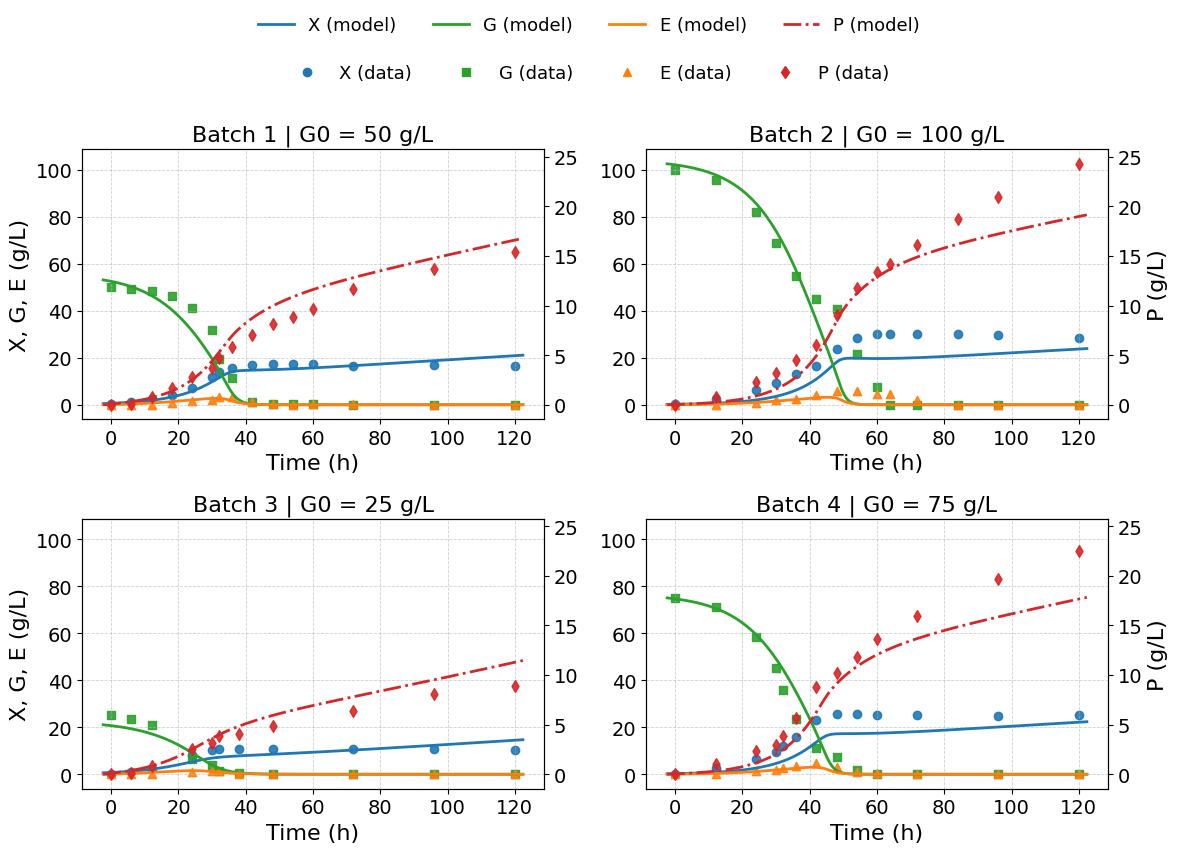

Saved:
  - batches_all_G0_from_data.eps
  - batches_all_G0_from_data.svg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------------------------------------
# ONE FIGURE WITH FOUR BATCHES + TWO HORIZONTAL LEGENDS ON TOP
#   - First legend: model curves
#   - Second legend: data markers
# --------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from matplotlib.lines import Line2D

params=global_best["best_params"]

plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 13,
    "figure.titlesize": 18
})

def _dense_time_grid(t_batch_np, n_time_plot=800, pad_frac=0.02):
    t0 = float(np.min(t_batch_np))
    t1 = float(np.max(t_batch_np))
    if t1 <= t0:
        t1 = t0 + 1e-6
    span = t1 - t0
    return jnp.linspace(t0 - pad_frac * span, t1 + pad_frac * span, n_time_plot)

def _learned_ic_for_train_batch(params, idx):
    x0_meas = params["ic_meas"]["x0"][idx]
    g0_meas = params["ic_meas"]["g0"][idx]
    alpha_x = params["ic_alpha"]["alpha_x"][idx]
    alpha_g = params["ic_alpha"]["alpha_g"][idx]
    x0 = x0_meas * jnp.exp(alpha_x)
    g0 = g0_meas * jnp.exp(alpha_g)
    return float(x0), float(g0), 0.0, 0.0

def _measured_ic_from_data(x_obs_np, g_obs_np):
    return float(x_obs_np[0]), float(g_obs_np[0]), 0.0, 0.0

# --- Colors ---
COL_X, COL_G, COL_E, COL_P = "#1f77b4", "#2ca02c", "#ff7f0e", "#d62728"

# --- Build dataset: 3 training + 1 validation ---
four_t = [t_train[0], t_train[1], t_train[2], t_valid[0]]
four_x = [x_train[0], x_train[1], x_train[2], x_valid[0]]
four_g = [g_train[0], g_train[1], g_train[2], g_valid[0]]
four_e = [e_train[0], e_train[1], e_train[2], e_valid[0]]
four_p = [p_train[0], p_train[1], p_train[2], p_valid[0]]
use_learned_ic = [True, True, True, False]

net_params = params["net"]
cache, left_vals, right_vals = [], [], []

for i in range(4):
    t_obs, x_obs, g_obs, e_obs, p_obs = map(np.array, [four_t[i], four_x[i], four_g[i], four_e[i], four_p[i]])
    t_dense = _dense_time_grid(t_obs)
    if use_learned_ic[i]:
        x0, g0_pred, e0, p0 = _learned_ic_for_train_batch(params, i)
    else:
        x0, g0_pred, e0, p0 = _measured_ic_from_data(x_obs, g_obs)
    x_pred, g_pred, e_pred, p_pred = predict(net_params, t_dense, x0, g0_pred, e0=e0, p0=p0, train=False, masks=None)
    G0_measured = int(round(g_obs[0]))
    cache.append({
        "t_obs": t_obs, "t_dense": np.array(t_dense),
        "x_obs": x_obs, "g_obs": g_obs, "e_obs": e_obs, "p_obs": p_obs,
        "x_pred": np.array(x_pred), "g_pred": np.array(g_pred),
        "e_pred": np.array(e_pred), "p_pred": np.array(p_pred),
        "G0_measured": G0_measured
    })
    left_vals.extend([x_obs, g_obs, e_obs, x_pred, g_pred, e_pred])
    right_vals.extend([p_obs, p_pred])

def _with_pad(vmin, vmax, frac=0.06):
    span = vmax - vmin
    if span <= 0:
        base = max(abs(vmin), abs(vmax), 1.0)
        return vmin - base * frac, vmax + base * frac
    pad = span * frac
    return vmin - pad, vmax + pad

left_lo, left_hi = _with_pad(min(np.min(v) for v in left_vals), max(np.max(v) for v in left_vals))
right_lo, right_hi = _with_pad(min(np.min(v) for v in right_vals), max(np.max(v) for v in right_vals))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

# --- Common legend handles ---
legend_model = [
    Line2D([0], [0], color=COL_X, lw=2, label='X (model)'),
    Line2D([0], [0], color=COL_G, lw=2, label='G (model)'),
    Line2D([0], [0], color=COL_E, lw=2, label='E (model)'),
    Line2D([0], [0], color=COL_P, lw=2, linestyle='-.', label='P (model)')
]
legend_data = [
    Line2D([0], [0], color=COL_X, marker='o', lw=0, label='X (data)'),
    Line2D([0], [0], color=COL_G, marker='s', lw=0, label='G (data)'),
    Line2D([0], [0], color=COL_E, marker='^', lw=0, label='E (data)'),
    Line2D([0], [0], color=COL_P, marker='d', lw=0, label='P (data)')
]

for i, entry in enumerate(cache):
    ax1, ax2 = axes[i], axes[i].twinx()
    ax1.set_ylim(left_lo, left_hi)
    ax2.set_ylim(right_lo, right_hi)
    # Model curves
    ax1.plot(entry["t_dense"], entry["x_pred"], '-', color=COL_X, lw=2)
    ax1.plot(entry["t_dense"], entry["g_pred"], '-', color=COL_G, lw=2)
    ax1.plot(entry["t_dense"], entry["e_pred"], '-', color=COL_E, lw=2)
    ax2.plot(entry["t_dense"], entry["p_pred"], '-.', color=COL_P, lw=2)
    # Data points
    ax1.scatter(entry["t_obs"], entry["x_obs"], marker='o', color=COL_X, alpha=0.9)
    ax1.scatter(entry["t_obs"], entry["g_obs"], marker='s', color=COL_G, alpha=0.9)
    ax1.scatter(entry["t_obs"], entry["e_obs"], marker='^', color=COL_E, alpha=0.9)
    ax2.scatter(entry["t_obs"], entry["p_obs"], marker='d', color=COL_P, alpha=0.9)
    # Titles and labels
    ax1.set_title(f"Batch {i+1} | G0 = {entry['G0_measured']} g/L")
    if i % 2 == 0:
        ax1.set_ylabel("X, G, E (g/L)")
    if i in (1, 3):
        ax2.set_ylabel("P (g/L)")
    ax1.set_xlabel("Time (h)")
    ax1.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)

# --- Add legends (two rows) ---
fig.legend(handles=legend_model, loc='upper center', ncol=4, frameon=False, bbox_to_anchor=(0.5, 1.08))
fig.legend(handles=legend_data, loc='upper center', ncol=4, frameon=False, bbox_to_anchor=(0.5, 1.02))

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Save EPS + SVG and allow download ---
eps_out = "batches_all_G0_from_data.eps"
svg_out = "batches_all_G0_from_data.svg"
fig.savefig(eps_out, format="eps", dpi=600, bbox_inches="tight")
fig.savefig(svg_out, format="svg", dpi=600, bbox_inches="tight")
print(f"Saved:\n  - {eps_out}\n  - {svg_out}")

try:
    from google.colab import files
    files.download(eps_out)
    files.download(svg_out)
except Exception:
    print("If using Colab, run manually:\n"
          f"from google.colab import files\n"
          f"files.download('{eps_out}')\n"
          f"files.download('{svg_out}')")


### **R² evaluation**

This block computes the **coefficient of determination (R²)** to assess the predictive accuracy of the *hybrid ODE–neural network* model.  
Predictions are evaluated *at the experimental sampling times* for **X**, **G**, **E**, and **P**.

- **Training set**: predictions use the **learned initial conditions**.
- **Validation set**: predictions use the **measured initial conditions only**.

R² values are reported **per batch and per variable**, together with their **average across batches**, and are **printed to the console only**.



In [ ]:
# --------------------------------------------------------
# R² METRICS (printed to console; not added to figures)
# --------------------------------------------------------
import numpy as np

def _measured_ic_for_batch(x_obs_np, g_obs_np):
    """
    Measured ICs from first observation; E0 = P0 = 0.0.
    """
    x0 = float(x_obs_np[0])
    g0 = float(g_obs_np[0])
    e0 = 0.0
    p0 = 0.0
    return x0, g0, e0, p0

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    y_true = y_true[mask]; y_pred = y_pred[mask]
    if y_true.size < 2:
        return np.nan
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return np.nan if ss_tot == 0 else 1.0 - ss_res/ss_tot

def _r2_for_split(t_split, x_split, g_split, e_split, p_split, use_learned_ics, title):
    print(f"\n==== R² per batch ({title}) ====")
    cols = ["Batch", "R²_X", "R²_G", "R²_E", "R²_P"]
    print("{:<7} {:>8} {:>8} {:>8} {:>8}".format(*cols))

    r2_x_all, r2_g_all, r2_e_all, r2_p_all = [], [], [], []

    for i in range(len(t_split)):
        t_obs = np.array(t_split[i])
        x_obs = np.array(x_split[i])
        g_obs = np.array(g_split[i])
        e_obs = np.array(e_split[i])
        p_obs = np.array(p_split[i])

        # ICs per the evaluation mode
        if use_learned_ics:
            x0, g0, e0, p0 = _learned_ic_for_train_batch(params, i)
        else:
            x0, g0, e0, p0 = _measured_ic_for_batch(x_obs, g_obs)

        # Predict exactly at observation times
        x_hat, g_hat, e_hat, p_hat = predict(params["net"], t_obs, x0, g0, e0=e0, p0=p0, train=False, masks=None)

        # Compute R² for each variable
        r2_x = r2_score(x_obs, x_hat); r2_x_all.append(r2_x)
        r2_g = r2_score(g_obs, g_hat); r2_g_all.append(r2_g)
        r2_e = r2_score(e_obs, e_hat); r2_e_all.append(r2_e)
        r2_p = r2_score(p_obs, p_hat); r2_p_all.append(r2_p)

        print("{:<7} {:>8.3f} {:>8.3f} {:>8.3f} {:>8.3f}".format(i+1,
              r2_x if np.isfinite(r2_x) else np.nan,
              r2_g if np.isfinite(r2_g) else np.nan,
              r2_e if np.isfinite(r2_e) else np.nan,
              r2_p if np.isfinite(r2_p) else np.nan))

    # Averages (ignore NaNs)
    def _nanmean(v):
        v = np.array(v, float)
        return np.nan if v.size == 0 else np.nanmean(v)

    avg_x = _nanmean(r2_x_all)
    avg_g = _nanmean(r2_g_all)
    avg_e = _nanmean(r2_e_all)
    avg_p = _nanmean(r2_p_all)

    print("{:<7} {:>8} {:>8} {:>8} {:>8}".format("—", "—", "—", "—", "—"))
    print("Avg    {:>8.3f} {:>8.3f} {:>8.3f} {:>8.3f}".format(
        avg_x if np.isfinite(avg_x) else np.nan,
        avg_g if np.isfinite(avg_g) else np.nan,
        avg_e if np.isfinite(avg_e) else np.nan,
        avg_p if np.isfinite(avg_p) else np.nan))
    print()

# ---- Print R² for TRAIN (learned ICs) ----
_r2_for_split(t_train, x_train, g_train, e_train, p_train, use_learned_ics=True,  title="TRAIN (learned ICs)")

# ---- Print R² for VALID (measured ICs) ----
_r2_for_split(t_valid, x_valid, g_valid, e_valid, p_valid, use_learned_ics=False, title="VALIDATION (measured ICs)")



==== R² per batch (TRAIN (learned ICs)) ====
Batch       R²_X     R²_G     R²_E     R²_P
1          0.846    0.983    0.873    0.961
2          0.509    0.945   -0.174    0.899
3          0.595    0.935    0.823    0.899
—              —        —        —        —
Avg       0.650    0.954    0.507    0.920


==== R² per batch (VALIDATION (measured ICs)) ====
Batch       R²_X     R²_G     R²_E     R²_P
1          0.429    0.920    0.738    0.862
—              —        —        —        —
Avg       0.429    0.920    0.738    0.862



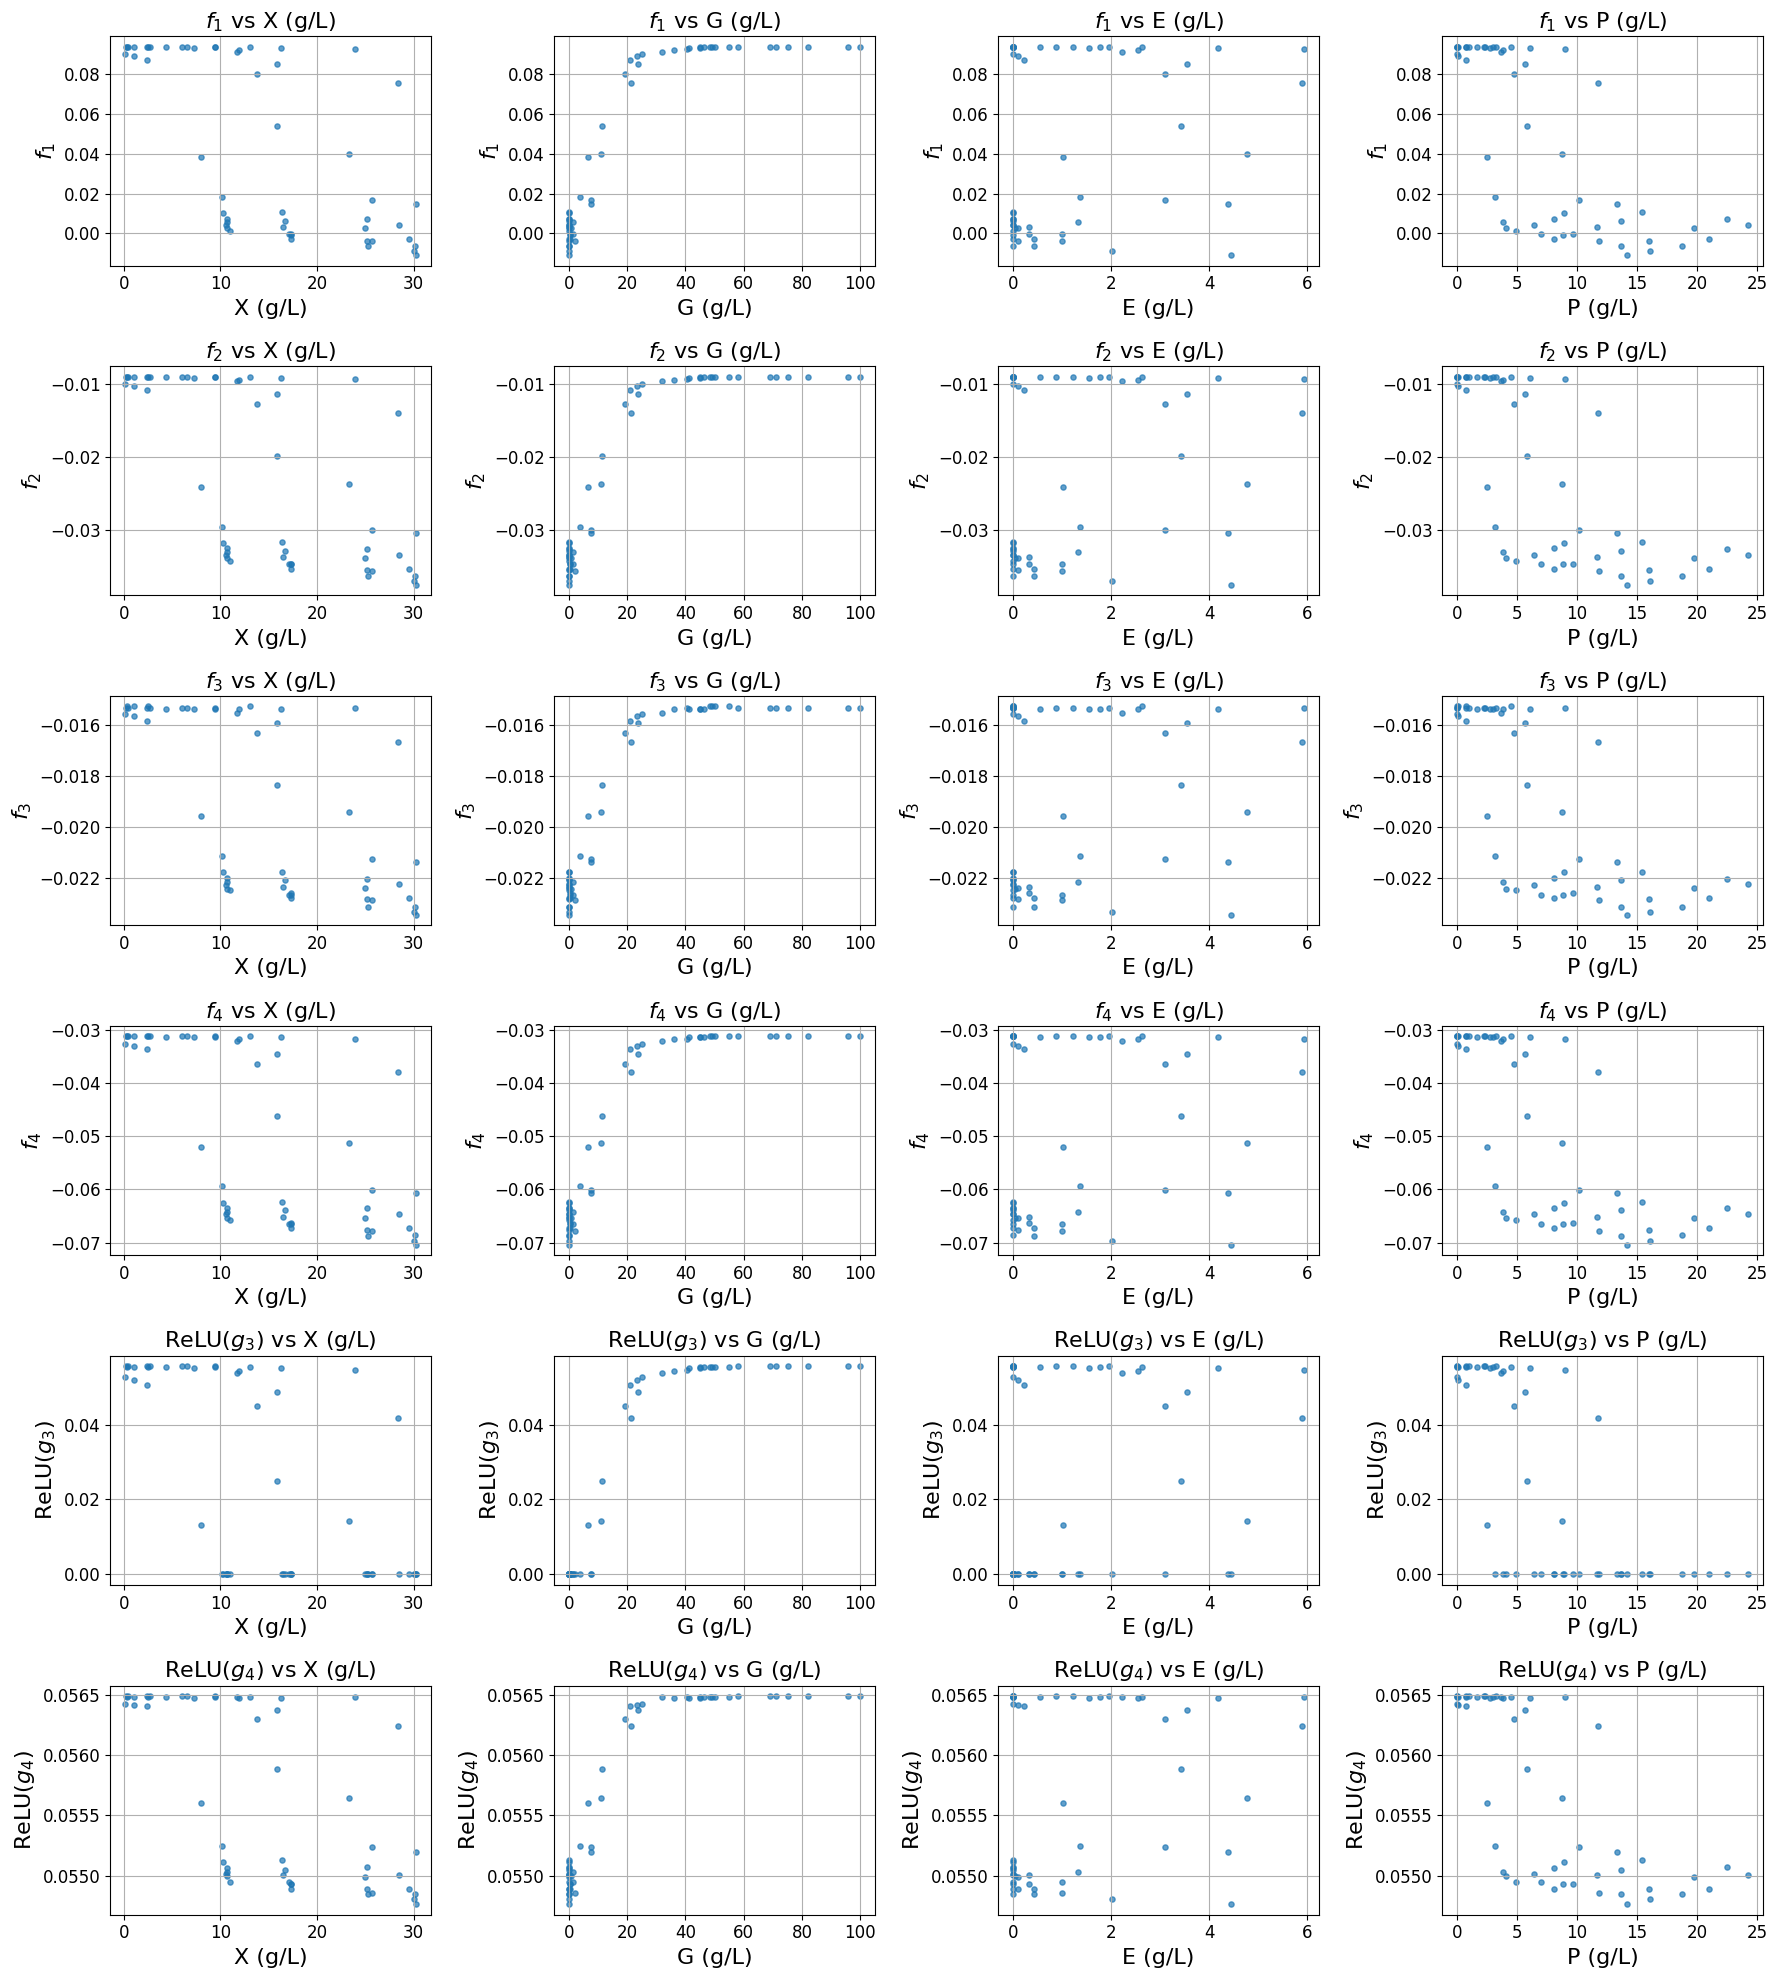

SVG guardado como: network_relationships.svg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

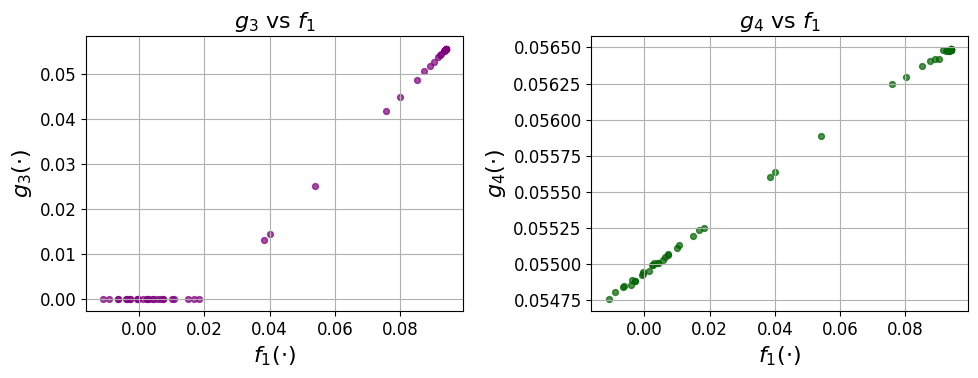

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

def plot_network_outputs(params, neural_network, raw_x, raw_g, raw_e, raw_p, *,
                         plot_g4_vs_f4=True, max_points=None, seed=0):
    """
    Visualiza las salidas de la red (f1,f2,f3,f4, g3, g4) frente a las entradas (X,G,E,P).
    - g3 y g4 se muestran con ReLU: ReLU(g3), ReLU(g4)
    - Figura 1: matriz 6x4 con (f1,f2,f3,f4,ReLU(g3),ReLU(g4)) vs (X,G,E,P)
    - Figura 2: relaciones g3 vs f1 y g4 vs f1 en una figura conjunta (2 subplots)

    args
    ----
    params: dict con al menos params["net"] (pesos de la red)
    neural_network: fn(net_params, y, train=False, masks=None) -> (f1,f2,f3,f4,g3,g4)
    raw_x, raw_g, raw_e, raw_p: listas de lotes (cada lote = array 1D o lista) para X,G,E,P
    plot_g4_vs_f4: (no usado aquí, pero se mantiene por compatibilidad)
    max_points: si no es None, submuestrea a esta cantidad total de puntos
    seed: semilla para el submuestreo
    """

    # ====== Fuentes más grandes ======
    plt.rcParams.update({
        "font.size": 14,
        "axes.titlesize": 16,
        "axes.labelsize": 16,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 12,
        "figure.titlesize": 18
    })

    # 1) Aplanar listas de lotes -> arrays 1D (y remover NaNs si hubiese)
    X_data = np.concatenate([np.asarray(lote).ravel() for lote in raw_x])
    G_data = np.concatenate([np.asarray(lote).ravel() for lote in raw_g])
    E_data = np.concatenate([np.asarray(lote).ravel() for lote in raw_e])
    P_data = np.concatenate([np.asarray(lote).ravel() for lote in raw_p])

    mask = (np.isfinite(X_data) & np.isfinite(G_data) &
            np.isfinite(E_data) & np.isfinite(P_data))
    X_data, G_data, E_data, P_data = X_data[mask], G_data[mask], E_data[mask], P_data[mask]

    # Submuestreo opcional para gráficas más limpias
    N = X_data.shape[0]
    if (max_points is not None) and (N > max_points):
        rng = np.random.default_rng(seed)
        idx = rng.choice(N, size=max_points, replace=False)
        X_data, G_data, E_data, P_data = X_data[idx], G_data[idx], E_data[idx], P_data[idx]

    # 2) Eval en batch con vmap
    net_params = params["net"]

    def _forward(y4):
        # y4: shape (4,) -> (f1,f2,f3,f4,g3,g4)
        return neural_network(net_params, y4, train=False, masks=None)

    Y = jnp.stack([jnp.asarray(X_data),
                   jnp.asarray(G_data),
                   jnp.asarray(E_data),
                   jnp.asarray(P_data)], axis=1)  # (N,4)

    outs = jax.vmap(_forward)(Y)  # (N,6)
    f1_vals = outs[:, 0]
    f2_vals = outs[:, 1]
    f3_vals = outs[:, 2]
    f4_vals = outs[:, 3]
    g3_raw  = outs[:, 4]
    g4_raw  = outs[:, 5]

    # 3) ReLU(g3), ReLU(g4) para trazados
    g3_vals = jnp.maximum(g3_raw, 0.0)
    g4_vals = jnp.maximum(g4_raw, 0.0)

    # 4) Figura 1: 6x4 (f1,f2,f3,f4,ReLU(g3),ReLU(g4)) vs (X,G,E,P)
    fig, axes = plt.subplots(6, 4, figsize=(18, 20), sharex=False, sharey=False)
    axes = np.asarray(axes)

    inputs = [
        (X_data, 'X (g/L)'),
        (G_data, 'G (g/L)'),
        (E_data, 'E (g/L)'),
        (P_data, 'P (g/L)'),
    ]
    funcs = [
        (np.asarray(f1_vals), r'$f_1$'),
        (np.asarray(f2_vals), r'$f_2$'),
        (np.asarray(f3_vals), r'$f_3$'),
        (np.asarray(f4_vals), r'$f_4$'),
        (np.asarray(g3_vals), r'$\mathrm{ReLU}(g_3)$'),
        (np.asarray(g4_vals), r'$\mathrm{ReLU}(g_4)$'),
    ]

    for row, (f_vals, f_label) in enumerate(funcs):
        for col, (inp_vals, xlabel) in enumerate(inputs):
            ax = axes[row, col]
            ax.scatter(inp_vals, f_vals, alpha=0.7, s=14)
            ax.set_xlabel(xlabel)
            ax.set_ylabel(f_label)
            ax.set_title(f'{f_label} vs {xlabel}')
            ax.grid(True)

    fig.tight_layout()
    plt.show()

# 6) Figura combinada: g3 vs f1  y  g4 vs f1  lado a lado
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # ---- Panel izquierdo: g3 vs f1 ----
    ax1.scatter(np.asarray(f1_vals), np.asarray(g3_vals),
                alpha=0.7, color='purple', s=18)
    ax1.set_xlabel(r'$f_1(\cdot)$')
    ax1.set_ylabel(r'$g_3(\cdot)$')
    ax1.set_title(r'$g_3$ vs $f_1$')
    ax1.grid(True)

    # ---- Panel derecho: g4 vs f1 ----
    ax2.scatter(np.asarray(f1_vals), np.asarray(g4_vals),
                alpha=0.7, color='darkgreen', s=18)
    ax2.set_xlabel(r'$f_1(\cdot)$')
    ax2.set_ylabel(r'$g_4(\cdot)$')
    ax2.set_title(r'$g_4$ vs $f_1$')
    ax2.grid(True)

    fig2.tight_layout()

    # ======== GUARDAR SVG ========
    svg_path = "network_relationships.svg"
    fig2.savefig(svg_path, format="svg", bbox_inches="tight")
    print(f"SVG guardado como: {svg_path}")

    # ======== DESCARGAR (si estás en Google Colab) ========
    try:
        from google.colab import files
        files.download(svg_path)
    except:
        pass

    plt.show()

# Ejemplo de uso:
plot_network_outputs(params, neural_network, raw_X, raw_G, raw_E, raw_P,
                     plot_g4_vs_f4=True, max_points=5000, seed=42)
